<a href="https://colab.research.google.com/github/MatheusRocha0/Customers-Segmentation/blob/main/Customers_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customers Segmentation
 
Customer segmentation is a marketing activity that involves breaking down your customers into a number of groups. It is very useful when a company is developing a markering strategy and wants to know more about their customers.
 
In this project I am going to analyze data and also build a customer segmentation system using Machine Learning algorithms.
 
## About the Dataset
 
For this project, I will be using a dataset I found on Kaggle about a Customers Database. You can download it here: https://bit.ly/37Jfxgz
 
This dataset brings informations like: Customer Id, Customer Age, Customer Spending Score, Customer Annual Income and Customer Gender. But it is not labeled, so it is necessary to use an Unsupervised Learning algorithm to label the dataset and then analyze the labeled data to understand the customers behavior.

# Importing

## Libraries

In [136]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import normalize
from scipy.cluster import hierarchy as sch
import numpy as np

## Data

In [137]:
url = "https://github.com/MatheusRocha0/Customers-Segmentation/raw/main/Mall_Customers.csv"
data = pd.read_csv(url)
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Setup

In [138]:
def jupyter_settings():
   %matplotlib inline
   %pylab inline 
   np.random.seed(1)
   sb.set()
   sb.set_palette("rocket")
   plt.style.use("seaborn-whitegrid")
   plt.rcParams["figure.figsize"] = [10, 10]
 
jupyter_settings()

Populating the interactive namespace from numpy and matplotlib


# Data Cleaning

## Detecting Missing Values

In [139]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

## Dropping Duplicates

In [140]:
data.drop_duplicates(inplace = True)

## Dropping Columns

In [141]:
data.drop("CustomerID", axis = 1, inplace = True)

## Changing Columns Names

In [142]:
new_names = [
"gender",
"age",
"ai",
"sc"
]
 
data.columns = new_names

In [143]:
data.tail()

,gender,age,ai,sc
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18
199,Male,30,137,83


## Changing Gender Variable Values

In [144]:
x = data.copy()
 
x.gender = x.gender.map(
{"Female": 0, "Male": 1}
)

## Normalization 
 
Normalization is the process of reorganizing data in a database. Normalization is important for many reasons, but chiefly because it allows databases to take up as little disk space as possible, resulting in increased performance.

In [145]:
x = normalize(x)

# Exploratory Data Analysis (EDA)

## Dataset Shape

In [146]:
print("Observations:", data.shape[0])
print("Variables:", data.shape[1])

Observations: 200
Variables: 4


## Variables Types

In [147]:
data.dtypes

gender    object
age        int64
ai         int64
sc         int64
dtype: object

## Statistical Informations
 
**Mean**: The arithmetic mean (or simply mean) of a list of numbers, is the sum of all of the numbers divided by the amount of numbers. 
 
**Standard Deviation (std)**: The standard deviation is the average amount of variability in your dataset.
 
**Quartiles (25%, 50%, 75%)**: A quartile is a type of quantile which divides the number of data points into four more or less equal parts, or quarters. They mean the maximum value for x% of the variable.

In [148]:
data.describe()

,age,ai,sc
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


Interesting Things:
 
• Maximum age is 70 and minimum age is 18.
 
• People who are older than 49 are not commom
 
• People with Annual Income greater than 78 are not commom.
 
• Spending Score mean is 50. 
 
• People with Spending Score greater than 73 are not commom.

## Gender Variable Distribution

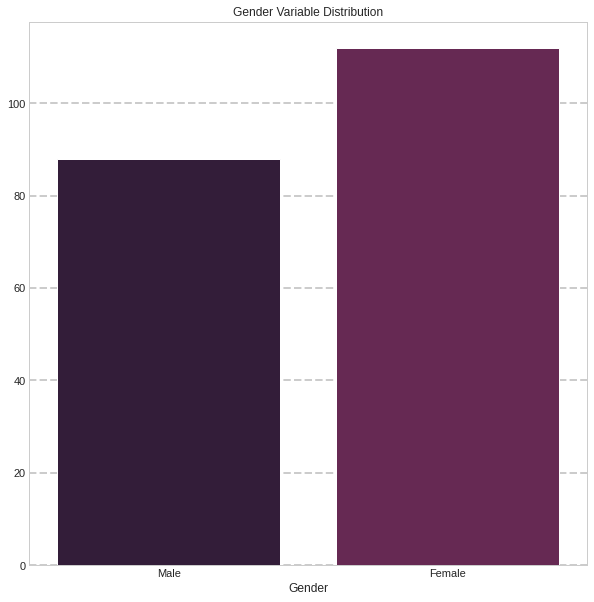

In [149]:
sb.countplot(data = data, x = "gender")
plt.title("Gender Variable Distribution")
plt.xlabel("Gender")
plt.ylabel("")
plt.grid(True, axis = "y", linewidth = 2, linestyle = "--")
plt.show()

There are more Women than Men in the Customers Database.

## Age Variable Distribution

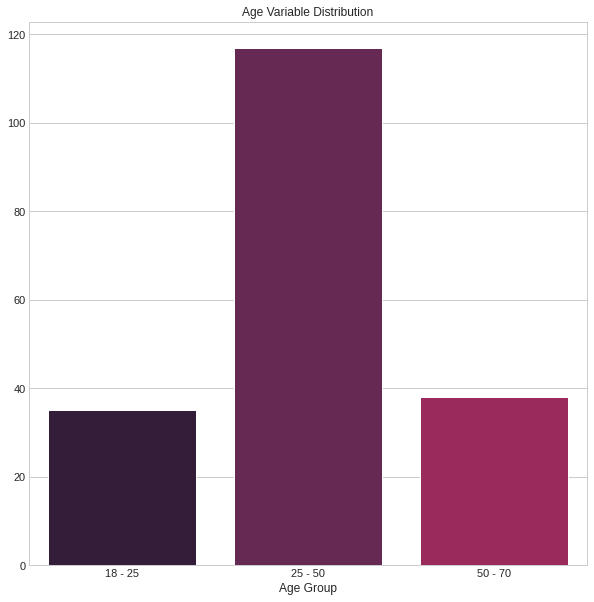

In [150]:
age18_25 = len(data.age.loc[data.age < 25])
age25_50 = len(data.age.loc[(data.age > 25) & (data.age < 50)])
age50_70 = len(data.age.loc[(data.age > 50) & (data.age < 70)])
 
labels = [
"18 - 25", "25 - 50", "50 - 70"
]
 
values = [
 age18_25, age25_50, age50_70
]
 
sb.barplot(x = labels, y = values)
plt.title("Age Variable Distribution")
plt.xlabel("Age Group")
plt.ylabel("")
plt.show()

Most of people are between 25 and 50 years old. Probably this bar is composed majority by younger people, since people who are over 49 are not commom in this dataset.

## Annual Income Distribution

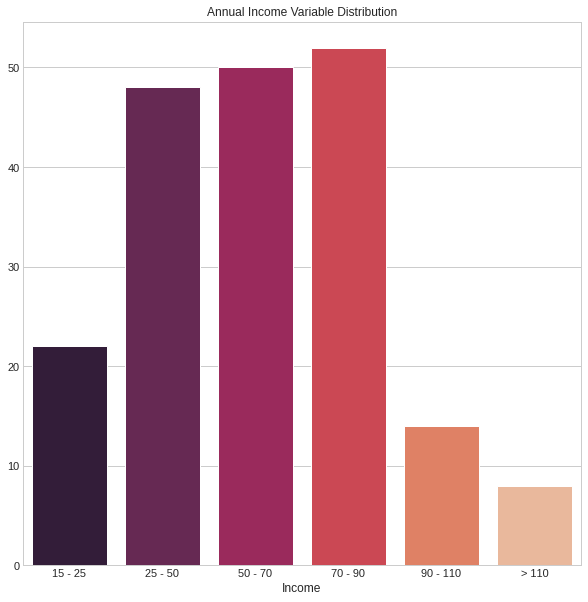

In [151]:
ai15_25 = len(data["ai"].loc[data["ai"] < 25])
ai25_50 = len(data["ai"].loc[(data["ai"] > 25) & (data["ai"] < 50)])
ai50_70 = len(data["ai"].loc[(data["ai"] > 50) & (data["ai"] < 70)])
ai70_90 = len(data["ai"].loc[(data["ai"] > 70) & (data["ai"] < 90)])
ai90_110 = len(data["ai"].loc[(data["ai"] > 90) & (data["ai"] < 110)])
ai_others = len(data["ai"].loc[(data["ai"] > 110)])
 
labels = [
"15 - 25", "25 - 50", "50 - 70", "70 - 90", "90 - 110", "> 110"
]
 
values = [
ai15_25, ai25_50, ai50_70, ai70_90, ai90_110, ai_others
]
 
sb.barplot(x = labels, y = values)
plt.title("Annual Income Variable Distribution")
plt.xlabel("Income")
plt.ylabel("")
plt.show()

Most of people have an annual income of 25 to 90.

## Spending Score Distribution

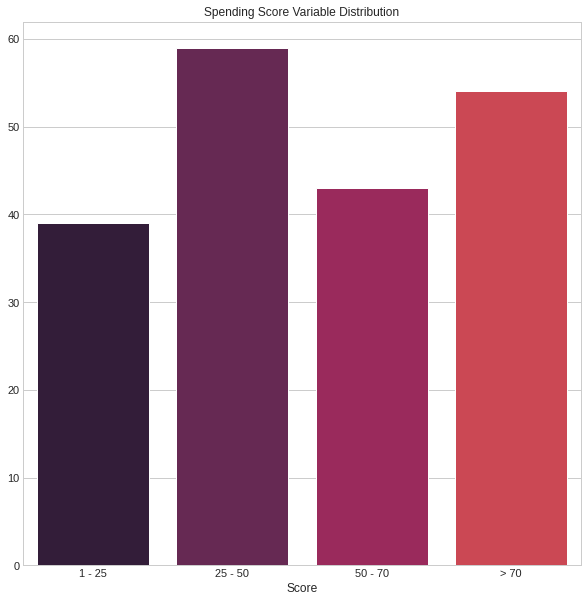

In [152]:
ss1_25 = len(data["sc"].loc[data["sc"] < 25])
ss25_50 = len(data["sc"].loc[(data["sc"] > 25) & (data["sc"] < 50)])
ss50_70 = len(data["sc"].loc[(data["sc"] > 50) & (data["sc"] < 70)])
ss_others = len(data["sc"].loc[data["sc"] > 70])
 
labels = [
"1 - 25", "25 - 50", "50 - 70", "> 70"
]
 
values = [
ss1_25, ss25_50, ss50_70, ss_others
]
 
sb.barplot(x = labels, y = values)
plt.title("Spending Score Variable Distribution")
plt.xlabel("Score")
plt.ylabel("")
plt.show()

This distribution is balanced.

## Annual Income By Gender

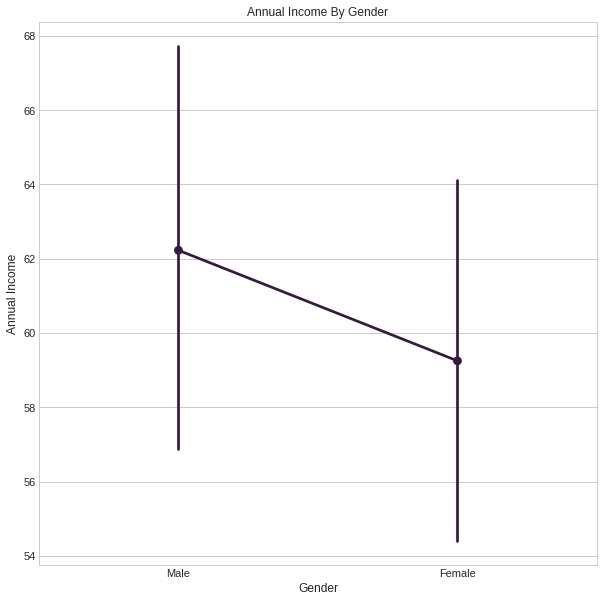

In [153]:
sb.pointplot(data = data, y = "ai", x = "gender")
plt.title("Annual Income By Gender")
plt.ylabel("Annual Income")
plt.xlabel("Gender")
plt.show()

Men make more money than Women.

## Spending Score By Gender

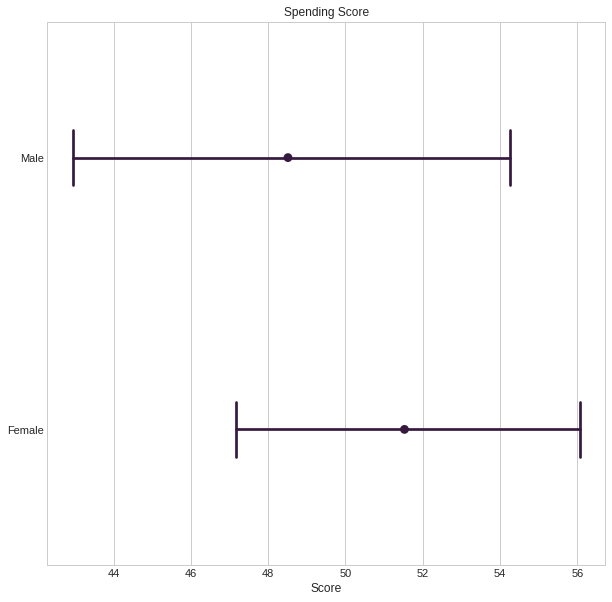

In [154]:
sb.pointplot(data = data, x = "sc", y = "gender", kind = "point", join = False, capsize = .2)
plt.title("Spending Score")
plt.xlabel("Score")
plt.ylabel("")
plt.show()

Even men making more, women still spend more.

## Age Distribution By Gender

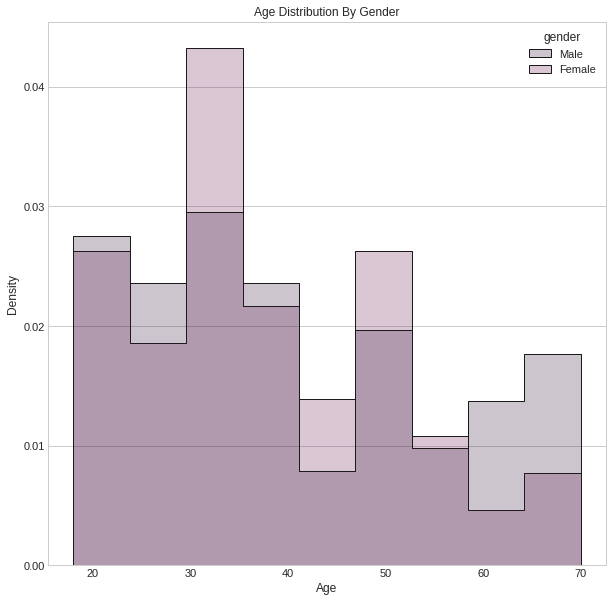

In [155]:
sb.histplot(data = data, x = "age", hue = "gender", element = "step", edgecolor = ".1", stat = "density", common_norm = False)
plt.title("Age Distribution By Gender")
plt.xlabel("Age")
plt.grid(axis = "x")
plt.show()

Most of young people (18 - 30) are Men.
 
Most of people who are 40 are also Women.
 
Most of older people (60 - 70) are Men.

## Annual Income By Age

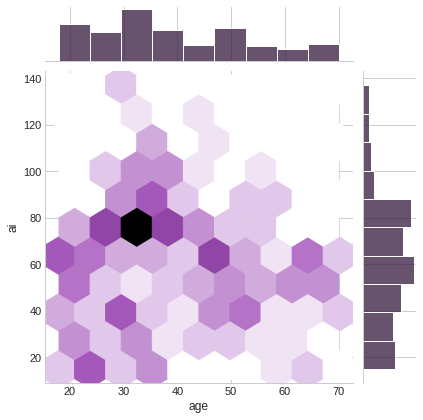

In [156]:
sb.jointplot(data = data, x = "age", y = "ai", kind = "hex")
plt.show()

This plot shows the distribution considering Age and Annual Income.
 
A dark color means that there are many customers with those characteristics and a light color is the opposite.
 
The strongest distribution here is that there are many people who are 30 - 40 and have an annual income of 62 - 84 thousands of dollars.

## Spending Score By Annual Income

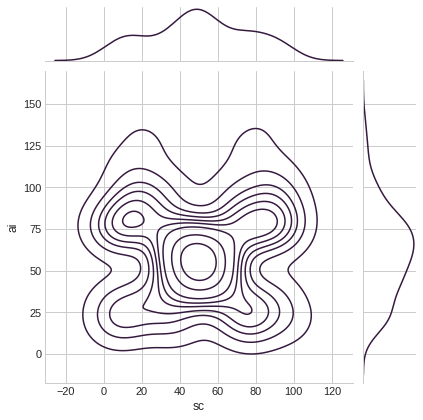

In [157]:
sb.jointplot(data = data, x = "sc", y = "ai", kind = "kde")
plt.show()

 
This plot ia showing that the distribution is very balanced.
 
Something visible here is that there is a tendency to 5 groups in this plot. This may influence the optimal number of Clusters in the algorithm that will be used to label the dataset.

# Machine Learning Model
 
It is a unsupervised learning task. We do not have labels in the dataset, so it is necessary to use a Clustering algorithm to label this dataset.
 
There are many Clustering algorithms, but I will be using Hie
 
**Hierarchical Clustering**: Hierarchical clustering, also known as hierarchical cluster analysis, is an algorithm that groups similar objects into groups called clusters. The endpoint is a set of clusters, where each cluster is distinct from each other cluster, and the objects within each cluster are broadly similar to each other. I will implement it using Scikit-learn.

## Dendrogram
 
A dendrogram is a diagram that shows the hierarchical relationship between objects. It is most commonly created as an output from hierarchical clustering. The main use of a dendrogram is to work out the best way to allocate objects to clusters.
 
To use dendrograms to get the optimal number of clusters in a dataset, it is necessary to think about the highest (euclidean) distance that does not intersect other clusters.

Using this method it is possible to see that the optimal number of clusters is 5.

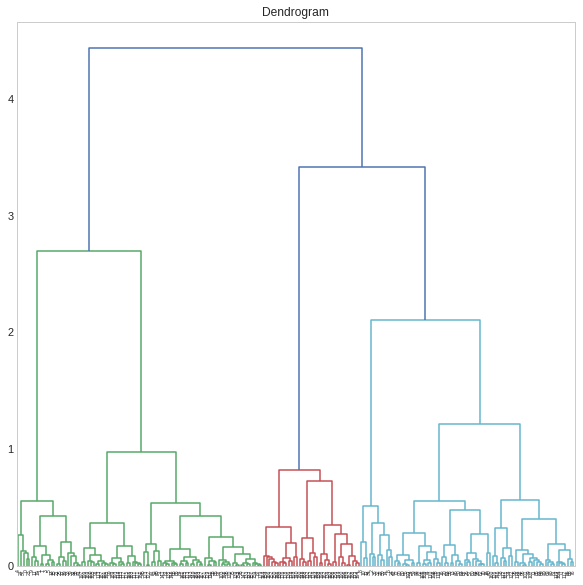

In [158]:
dendrogram = sch.dendrogram(sch.linkage(x, method = "ward"))
plt.title("Dendrogram")
plt.grid(False)

## Model

In [159]:
model = AgglomerativeClustering(n_clusters = 5, affinity = "euclidean", linkage = "ward")
model.fit(x)
labels = model.labels_

In [160]:
labels

array([3, 3, 4, 3, 3, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0, 3, 0, 3, 0, 3,
       4, 3, 4, 3, 0, 3, 0, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0, 3, 0, 3, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

## Labeling the Dataset
 
Now it is possible to label the dataset using the Labels.

In [161]:
data["label"] = labels

## Pair Plot

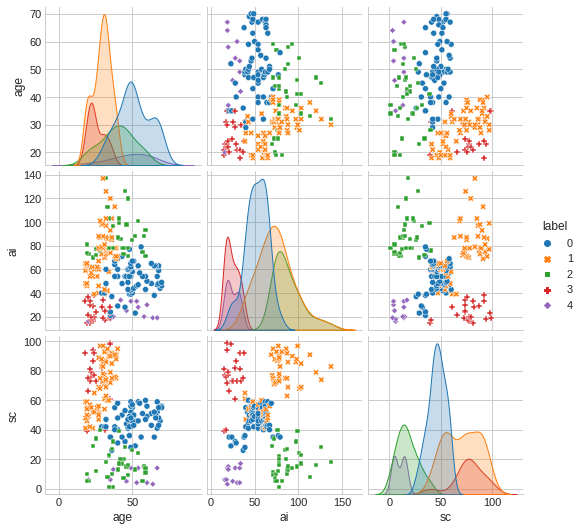

In [162]:
sb.pairplot(data = data, hue = "label", markers = True, palette = "tab10")
plt.show()

This plot does not show the Gender variable, so I will plot another chart.

## Gender By K-Label

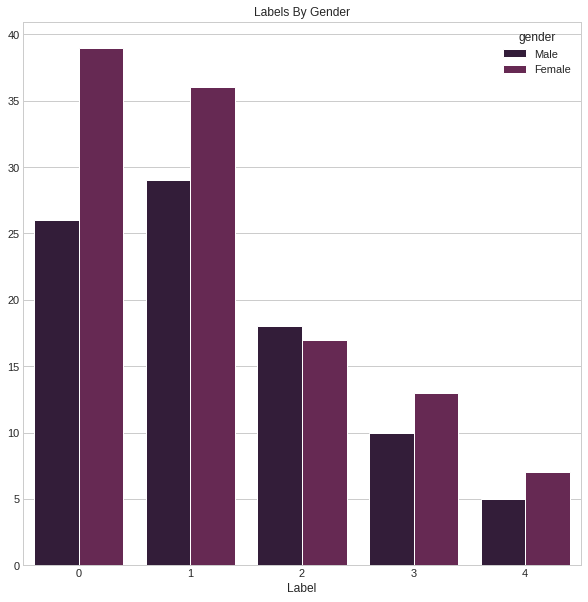

In [163]:
sb.countplot(data = data, x = "label", hue = "gender")
plt.title("Labels By Gender")
plt.xlabel("Label")
plt.ylabel("")
plt.show()

## Labels Distribution

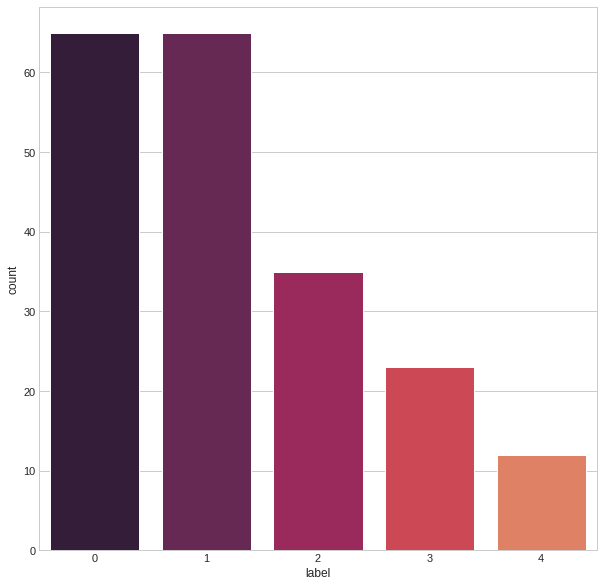

In [164]:
sb.countplot(data = data, x = "label")
plt.show()

# Conclusion
 
**Group 0**: neutral spending score and low income. The company should try to focus in them.
 
**Group 1**: high spending score and high income. These are the best customers. 
 
**Group 2**: high income and low spending score. This group has a high potential. The company should focus in them.

**Group 3**: low spending score and low income. These are also ones of the best customers. Even not having too much they like the product/service and spend their money in it.

**Group 4**: low spending score and low income. There is no much to do about these customers.